Nick Harris
Fellowship.ai image segmentation challenge 
The project will use _CelebA_ dataset for facial images.

In [1]:
import numpy as np #will need data in numpy array to feed into model
import pandas as pd #easy DF imports
import os #path handling
import matplotlib.pyplot as plt
import seaborn as sns #good functionality on top of matplotlib

In [ ]:
#Importing annotations first to perform EDA in order to see general distribution of various attributes seen in these images. 
pathbase=os.getcwd()
attr_path=r"images\annotations\list_attr_celeba.txt"
celeb_attr=pd.read_csv(os.sep.join([pathbase, attr_path]), sep=" +", header=1, engine='python')
attr_tidy=celeb_attr.melt(var_name='attribute') #data needs to be tidy for easy graphing with seaborn

In [34]:
print(celeb_attr.info())
#Output hidden, just verifying there aren't null entries in attribute dataset

<class 'pandas.core.frame.DataFrame'>
Index: 202599 entries, 000001.jpg to 202599.jpg
Data columns (total 40 columns):
5_o_Clock_Shadow       202599 non-null int64
Arched_Eyebrows        202599 non-null int64
Attractive             202599 non-null int64
Bags_Under_Eyes        202599 non-null int64
Bald                   202599 non-null int64
Bangs                  202599 non-null int64
Big_Lips               202599 non-null int64
Big_Nose               202599 non-null int64
Black_Hair             202599 non-null int64
Blond_Hair             202599 non-null int64
Blurry                 202599 non-null int64
Brown_Hair             202599 non-null int64
Bushy_Eyebrows         202599 non-null int64
Chubby                 202599 non-null int64
Double_Chin            202599 non-null int64
Eyeglasses             202599 non-null int64
Goatee                 202599 non-null int64
Gray_Hair              202599 non-null int64
Heavy_Makeup           202599 non-null int64
High_Cheekbones        202

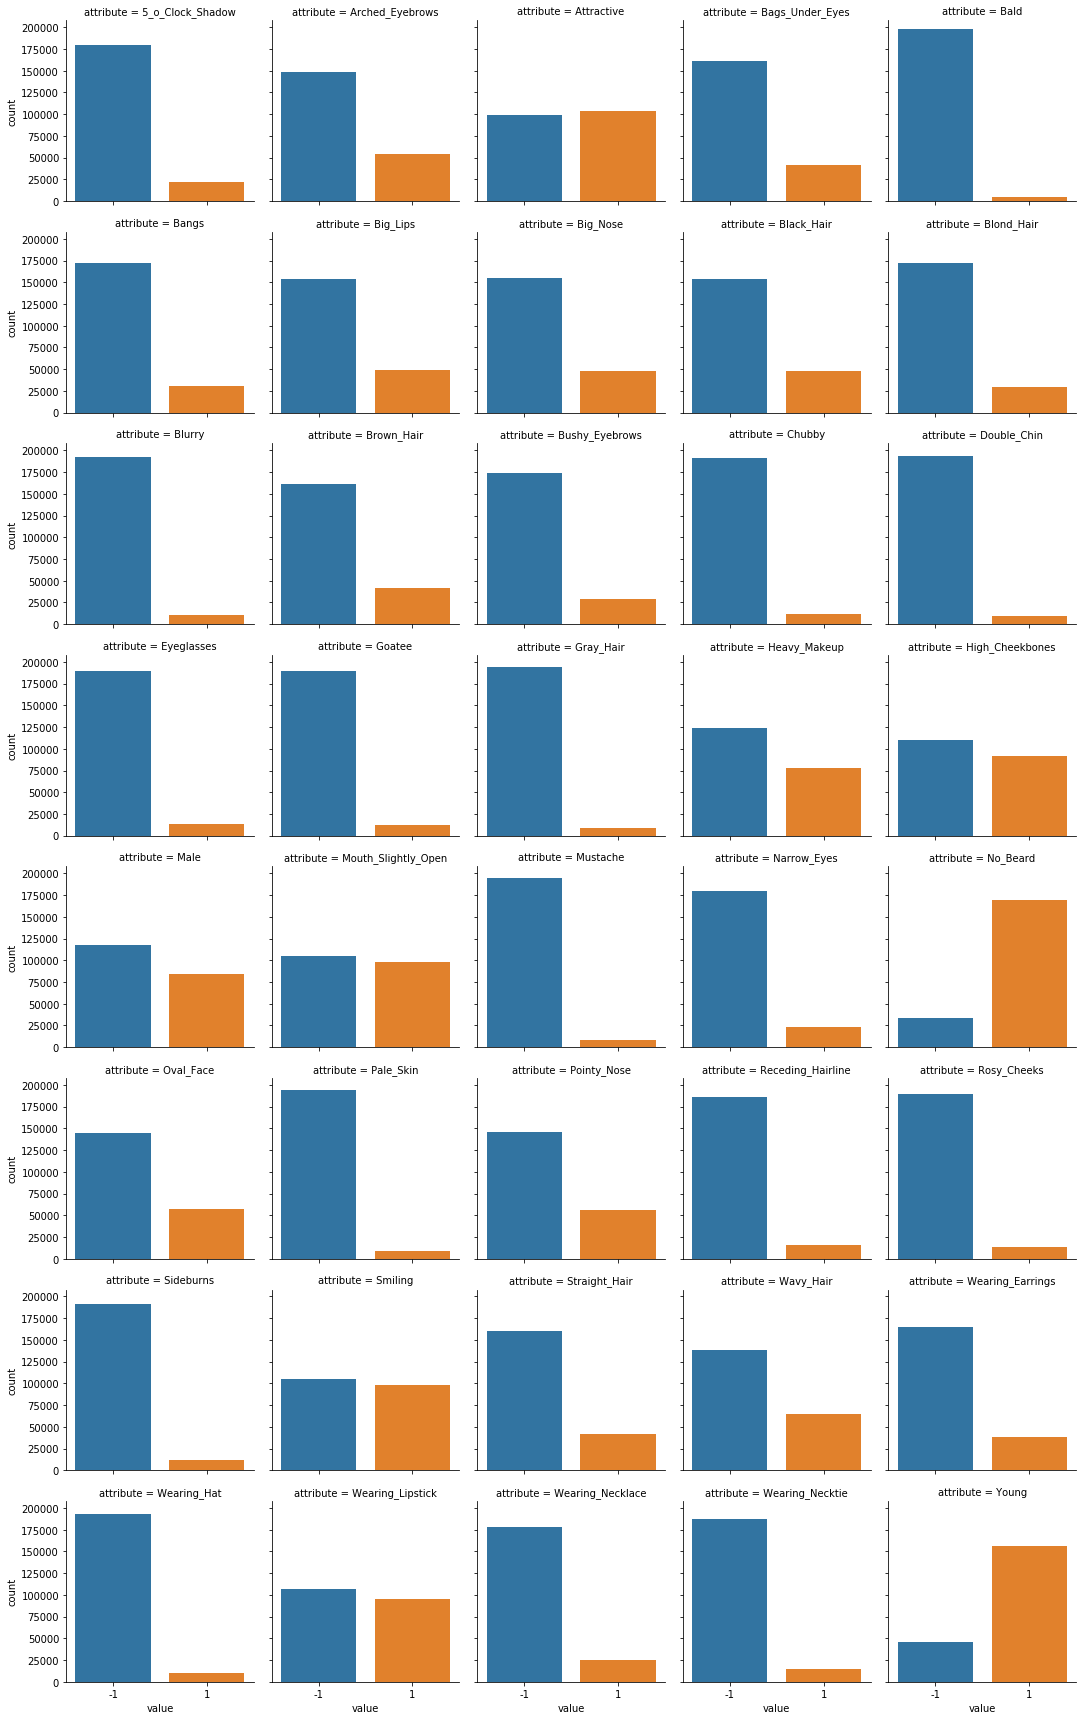

In [33]:
#Boxplots to visualize relative proportion of images that have each attribute
sns.catplot(data=attr_tidy, x='value', y=None, col='attribute', kind='count', col_wrap=5, height=3, aspect=1)

We can already see that a number of attributes are not going to be well represented in the training set. This isn't suprising given that many of these attributes are expected to belong to only a smaller percentage of the population (sadly 50% of people don't sport mustaches), but it does give us cases to scrutinize once we have a working model. Based on how strongly they affect the shape of important areas combined with relative ratios, I expect hats, double chins, blurry images, glasses, earrings and beards to all possibly have low accuracy. Attributes like mouth open and pointy nose are unlikely to come into play since they won't often interact with face-edge boundaries.

Racial attributes aren't included in the dataset, but given that this data comes from a set of western celebrities, poor minority representation is likely. This is a problem with most facial datasets I've come across and generally leads to worse performance working with BIPOC persons in images.